# Homework

[//]: # "##### Write a Julia function of the bisection method that has the following specifications.

- The function name has to be `bisection_a`. (So that TA can test your code by simply pasting a test code to your homework.)

- An example of its usage is: `bisection_a(f, -1, 2, 1e-6, 10)`
   - `f` is the name of a function to be subjected for root-finding,   
   - `-1` is the lower bound of the initial bracket,
   - `2` is the upper bound of the initial bracket,
   - `1e-6` is the convergence criterion,
   - `10` is the maximum number of iterations.
   
- It should check whether the initial bracket contains the root.   
   
- If it hits the maximum number of iterations before convergence, it should print the result from the last iteration with an informative error message.

-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using `Plots`.
  - Use `bisection_a` to find the root of $f(x)$."






## The following `bisection` is a Julia program for root finding using the bisection method.
- Add comments to places marked by `##` to explain the lines.
  - For instance (a silly example): `iter=1   ## starts the iteration count`.
  - Your comments should be more extensive than what you normally do for your own code, because the purpose is to see if you understand the purpose of the code.
-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using the `Plots` package.
  - Use `bisection` to find the root of $f(x)$.  

In [2]:
function bisection(f::Function,a,b,eps,imax)
    
    f(a)f(b)<0 || throw("The ($a, $b) does not contain the solution.")  ## check the condition of IVT 
    
    iter=1                           
    p=0.0      
    while iter<=imax                  ## Start loop that runs until maximum number of iterations is reached
        p = a+(b-a)/2                 ## calculate the middle point of the interval
        if f(p)==0 || abs(a-b)<eps    ## Check if the midpoint is the solution or if the interval is small enough
            return println("p is $p and the iteration number is $iter")
        end      
    
        f(a)f(p)<0 ? b=p : a=p        ## Narrow the interval [a,b] based on the sign of f(a)*f(p). If f(a)f(p)<0 is true,
                                      ## the value of b is updated to p (new interval is [a,p]); o.w., the value of a
        iter += 1                     ## is updated to p (new interval is [p, b])
    end                               ## This is similar to ifelse(f(a)*f(p)<0, b=p, a=p) in R
    
    y=f(p)                            ## Calculate the function value at the midpoint p
    println("Maximum number of iterations is researched and the method did not converge. The last iteration gives $p with function value $y")   ## Print the final message indicating that the maximum number of iterations is reached and the method does not converge
end



bisection (generic function with 1 method)

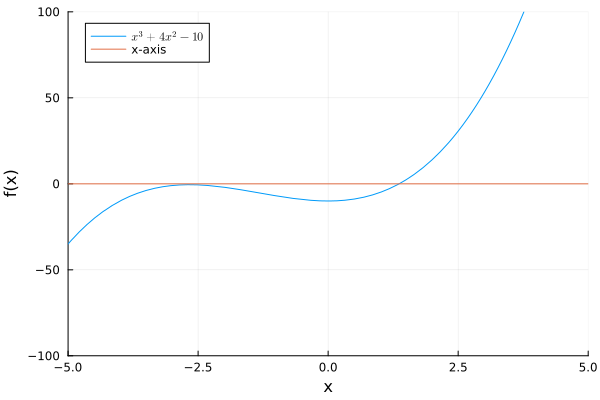

In [3]:
f(x) = x^3+4*x^2-10

using Plots, LaTeXStrings

legend = L"x^3+4x^2-10"

plot(x -> f(x), xlim=[-5,5], ylim=[-100,100] ,xlabel="x", ylabel="f(x)", label=legend)
hline!([0], label="x-axis")

In [4]:
bisection(f, -5, 5, 1e-9, 10000)

using Roots
root = fzeros(f, -5, 5)
@show root

p is 1.3652300133253448 and the iteration number is 35
root = [1.3652300134140969]


1-element Vector{Float64}:
 1.3652300134140969

## Suppose you are dealing with functions that have multiple roots such as the `h(x)` given below.  In general, it is not possible to find all the roots for such functions without further information. Nevertheless, if the roots are reasonably spaced apart (e.g., the distance between them is much larger than the error tolerance used in checking convergence), we could find the roots that fall in a given interval $[a, b]$.

- Use the package `Plots` to plot the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ for $x$ in the range of $[-10, 10]$. 
  - The graph is to give you an idea of what multiple roots mean.

- Modify `bisection` so that it can deal with functions that have multiple roots in the range of $[a,b]$.  Name the function `bisection_b`.
  - Hint: You may start from one end of the bracket, find the first root, use it to find the next one.
  - The function should not be tailored to $h(x)$ given above. It should be general enough for other multiple-roots functions.

- Suppose you are given the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ and you are NOT allowed to plot the function for inspection. The only information you have is that it has multiple roots in $[-7,7]$. Use `bisection_b` to find the roots of $h(x)$.

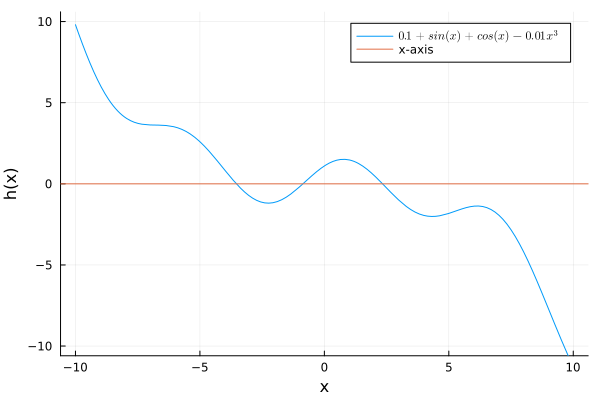

In [1]:
using Plots, LaTeXStrings

legend = L"0.1+sin(x)+cos(x)-0.01x^3"

h(x)=0.1+sin(x)+cos(x)-0.01*x^3

plot(x -> h(x), xlim=[-10,10], ylim=[-10,10] ,xlabel="x", ylabel="h(x)", label=legend)
hline!([0], label="x-axis")


In [17]:
function bisection_b(f::Function,a,b,eps,imax)
    
    roots=[]
    
    step = (b-a)*eps
    c = a + step
    
    while c<=b
        
        if f(c)*f(a)<0
        
            iter=1                           
            p=0.0
            a_inside = a
            c_inside = c
            while iter<=imax 
                
                p = a_inside+(c_inside-a_inside)/2                 
                if f(p)==0 || abs(a_inside-c_inside)<eps    
                    push!(roots, p) 
                    break
                end      

                f(a_inside)f(p)<0 ? c_inside = p : a_inside = p       

                iter += 1                    
            end
            

        
        end
        
        a = c
        c = a + step
        
    end
    
    return roots
end

h(x)=0.1+sin(x)+cos(x)-0.01*x^3

bisection_b(h, -7, 7, 1e-8, 10000)

3-element Vector{Any}:
 -3.5341251959507876
 -0.8606883539878875
  2.336687261547307

In [8]:
using Roots
root = fzeros(h, -7, 7)
@show root

root = [-3.534125198518251, -0.8606883567692761, 2.336687264458166]


3-element Vector{Float64}:
 -3.534125198518251
 -0.8606883567692761
  2.336687264458166

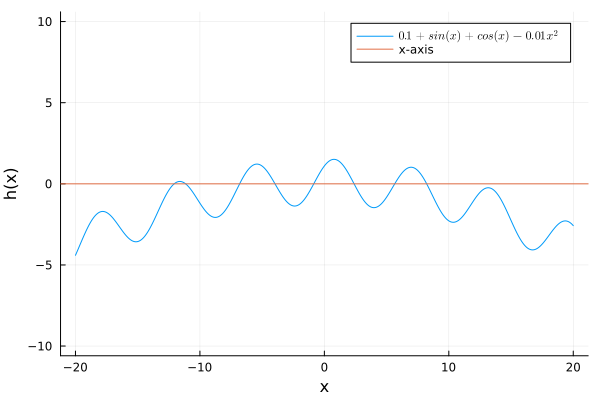

In [19]:
using Plots, LaTeXStrings

legend = L"0.1+sin(x)+cos(x)-0.01x^2"

h(x) = 0.1 + sin(x) + cos(x) - 0.01x^2
plot(x -> h(x), xlim=[-20,20], ylim=[-10,10] ,xlabel="x", ylabel="h(x)", label=legend)
hline!([0], label="x-axis")

In [20]:
bisection_b(h, -20, 20, 1e-8, 10000)

8-element Vector{Any}:
 -12.067986454592798
 -11.152151187341635
  -6.808582616804751
  -3.9676031651819637
  -0.851034666184584
   2.386632946185653
   5.653732246302008
   8.220120447311672

In [11]:
using Roots
root = fzeros(h, -20, 20)
@show root

root = [-12.067986455250274, -11.152151185134874, -6.80858261510439, -3.967603166863218, -0.8510346684037365, 2.3866329470760617, 5.653732244247725, 8.220120447201698]


8-element Vector{Float64}:
 -12.067986455250274
 -11.152151185134874
  -6.80858261510439
  -3.967603166863218
  -0.8510346684037365
   2.3866329470760617
   5.653732244247725
   8.220120447201698